Support vector machines
===

Let's create some fake income / age clustered data

In [6]:
import random
import numpy as np
def createClusteredData(N,k):
    random.seed(100)
    pointsPerCluster = float(N)/k
    X=[]
    y = []
    for i in range(k):
        incomeCentroid = random.uniform(20000,200000)
        ageCentroid = random.uniform(20,70)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid,10000),np.random.normal(ageCentroid,2)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X,y

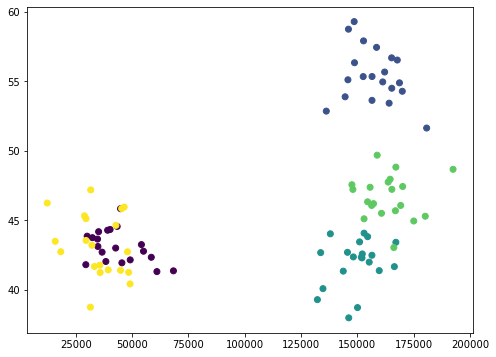

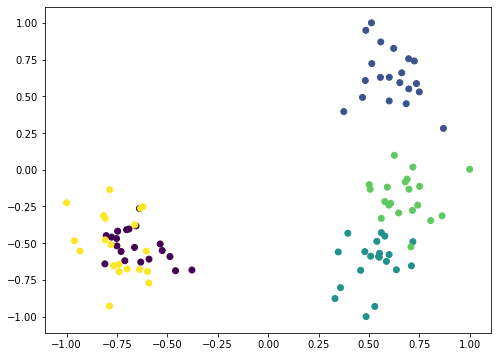

In [10]:
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import MinMaxScaler

(X,y) = createClusteredData(100,5)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c = y.astype(np.float))
plt.show()

scaling = MinMaxScaler(feature_range = (-1, 1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c = y.astype(np.float))
plt.show()

Now we use the linear SVC to partition our graphs into clusters

In [25]:
from sklearn import svm,datasets

C = 1.0
scv = svm.SVC(kernel = 'sigmoid', C = C).fit(X, y) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

To visualize the ranges

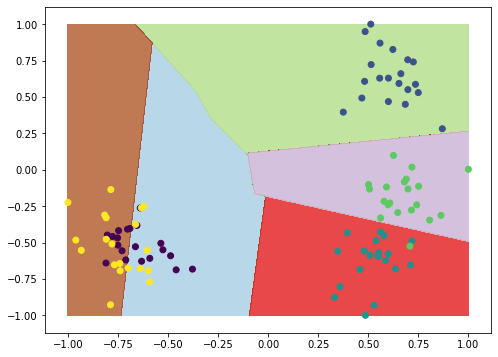

In [15]:
def plotPredictions(clf):
    # create a dense grid of points to sample
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                         np.arange(-1, 1, .001))
    
    # Convert to np arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    #convert to list of 2D points
    samplePoints = np.c_[npx,npy]
    
    # generate predicted labels of each point
    Z = clf.predict(samplePoints)
    
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx,yy,Z,cmap = plt.cm.Paired, alpha = .8) #draw contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) #draw points
    plt.show()
    
plotPredictions(scv)
    

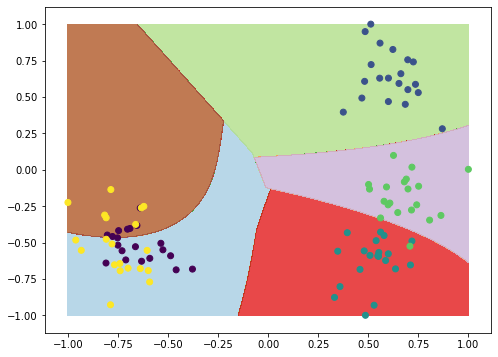

In [23]:
plotPredictions(scv)

prediction

In [17]:
print(scv.predict(scaling.transform([[200000,40]])))

[2]
